<a href="https://colab.research.google.com/github/leolaipelt/Curso_Basico_Python/blob/master/06_Exerc%C3%ADcio_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [0]:
import pandas as pd

#with open('/content/gdrive/My Drive/Dados_POA.txt', 'rb') as data:
 # print(data)
  
df=pd.read_csv('Dados_POA.txt',sep=',')

In [0]:
df.head()

,codigo_estacao,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,A801,14102018,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A801,14102018,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A801,14102018,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A801,14102018,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A801,14102018,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Vamos converter a coluna de data no pandas em arquivo data

def convert_data(data_string):
  return datetime.strptime(data_string, "%d%m%Y").strftime('%m-%d-%Y')

df=pd.read_csv('Dados_POA.txt',sep=',',parse_dates=True,converters={'data':convert_data})

In [0]:
df_diario=df.groupby('data').mean()

In [0]:
#Quais são as chaves desse nosso DataFrame?
print(df.keys())

Index(['codigo_estacao', 'data', 'hora', 'temp_inst', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_direcao', 'vento_vel', ' vento_rajada',
       'radiacao', 'precipitacao'],
      dtype='object')


([<matplotlib.axis.XTick at 0x7f8759ed2550>,
 <a list of 13 Text xticklabel objects>)

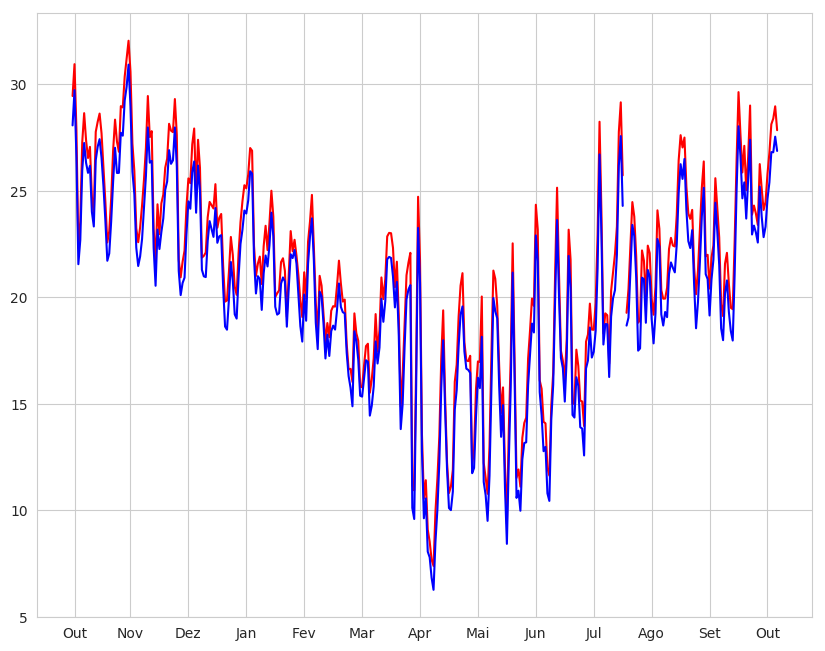

In [0]:
fig, ax =plt.subplots(1,1,figsize=(10,8), dpi=100)

plt.plot(df_diario["temp_max"],color='r')
plt.plot(df_diario["temp_min"],color='b') 


plt.xticks([1,30,60,90,120,150,180,210,240,270,300,330,360],['Out','Nov','Dez','Jan','Fev','Mar','Apr','Mai','Jun','Jul','Ago','Set','Out'])

In [0]:
#Vamos fazer um gráfico de Precipitação do último Ano!

In [0]:
df=pd.read_csv('Dados_POA.txt',sep=',',parse_dates=True,converters={'data':convert_data})


df_diario=df.groupby('data').sum()

([<matplotlib.axis.XTick at 0x7f8757b2df28>,
 <a list of 13 Text xticklabel objects>)

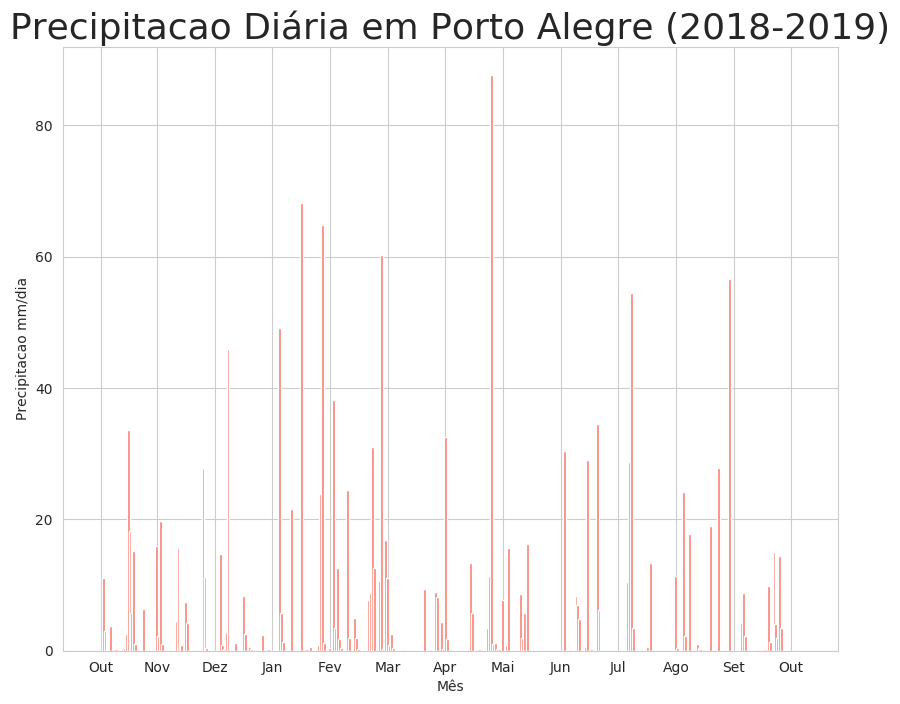

In [0]:
fig, ax =plt.subplots(1,1,figsize=(10,8), dpi=100)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 22


plt.title('Precipitacao Diária em Porto Alegre (2018-2019)', fontsize=26)
plt.xlabel('Mês')
plt.ylabel('Precipitacao mm/dia') 

plt.bar(df_diario.index,df_diario["precipitacao"],color='salmon',width =1.5)
plt.xticks([1,30,60,90,120,150,180,210,240,270,300,330,360],['Out','Nov','Dez','Jan','Fev','Mar','Apr','Mai','Jun','Jul','Ago','Set','Out'])

Text(-14.325000000000003, 0.5, 'Radiacao')

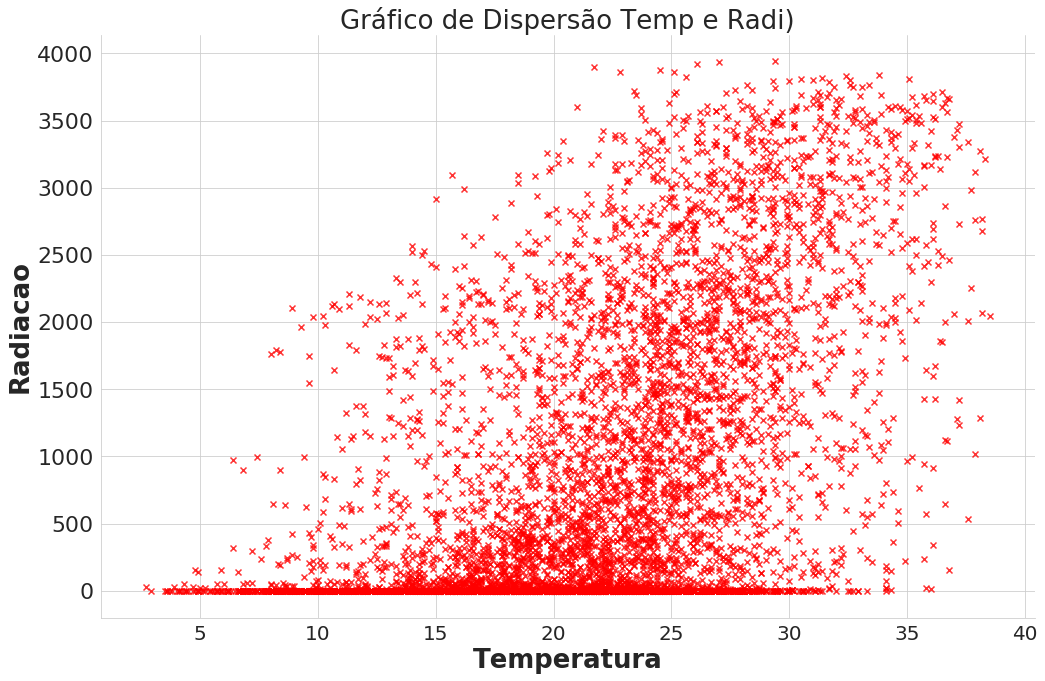

In [0]:

# Scatterplot arguments
sns.lmplot(x='temp_max', y='radiacao', data=df,fit_reg=False,height=9,aspect=1.6, markers=[ "x"],scatter_kws={"color":"red"})

plt.title('Gráfico de Dispersão Temp e Radi)', fontsize=26)
plt.xlabel('Temperatura',fontsize=26)
plt.ylabel('Radiacao',fontsize=26)